In [1]:
# Дла работы с табличными данными
import pandas as pd
# Для работы с массивами и математическими операциями
import numpy as np

# Для визуализации
import matplotlib
import matplotlib.pyplot as plt
# Эта строчка задает определенный стиль картинок
matplotlib.style.use('ggplot')
# matplotlib Inline позволяет выводить график в каждой отдельной ячейки для всего ноутбука
%matplotlib inline

# Для построения PACF, ACF и линейной модели
import statsmodels.api as sm
# import statsmodels.formula.api as smf

# Для использования exp
from math import log

# Отключение предупреждений
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# Загружаем данные
df_gdpUSA = pd.read_excel('C:\\Games\\DS\\Ukrain_GDP.xlsx')
df_gdpUSA.head() # Метод head выводит первые 5 строк таблицы, убеждаемся, что таблица прочиталась корректно

,MEASURE,USA
0,1970,47235.697
1,1971,47637.239
2,1972,48026.627
3,1973,48367.002
4,1974,48676.939


In [ ]:
Считаем логариым от ряда
df_gdpUSA['USA_log'] = df_gdpUSA['USA'].apply(lambda x: log(x))
# функция apply применяет функцию в скобках к каждому элементу столбца
# lambda x: log(x) - вид записи анонимной функции в python
df_gdpUSA.head()

In [3]:
df_gdpUSA['USA_log'] = df_gdpUSA['USA'].apply(lambda x: log(x))
# функция apply применяет функцию в скобках к каждому элементу столбца
# lambda x: log(x) - вид записи анонимной функции в python
df_gdpUSA.head()

,MEASURE,USA,USA_log
0,1970,47235.697,10.762905
1,1971,47637.239,10.771370
2,1972,48026.627,10.779511
3,1973,48367.002,10.786573
4,1974,48676.939,10.792961


<AxesSubplot:>

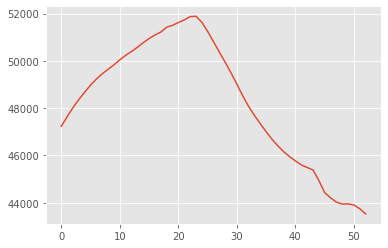

In [4]:
df_gdpUSA['USA'].plot() # По умолчанию функция plot строит линейный график

<AxesSubplot:>

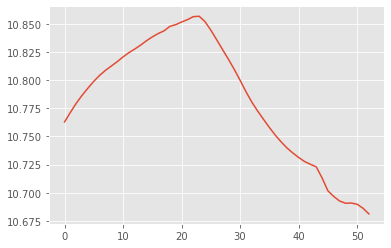

In [5]:
df_gdpUSA['USA_log'].plot() # По умолчанию функция plot строит линейный график

In [6]:
# Формируем лаги
for i in range(1, 7): # Для диапазона значений [1,6]
    df_gdpUSA['USA_log_l' + str(i)] = [0]*i + df_gdpUSA['USA_log'][:-i].tolist()

In [7]:
df_gdpUSA.head()

,MEASURE,USA,USA_log,USA_log_l1,USA_log_l2,USA_log_l3,USA_log_l4,USA_log_l5,USA_log_l6
0,1970,47235.697,10.762905,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,1971,47637.239,10.771370,10.762905,0.000000,0.000000,0.000000,0.0,0.0
2,1972,48026.627,10.779511,10.771370,10.762905,0.000000,0.000000,0.0,0.0
3,1973,48367.002,10.786573,10.779511,10.771370,10.762905,0.000000,0.0,0.0
4,1974,48676.939,10.792961,10.786573,10.779511,10.771370,10.762905,0.0,0.0


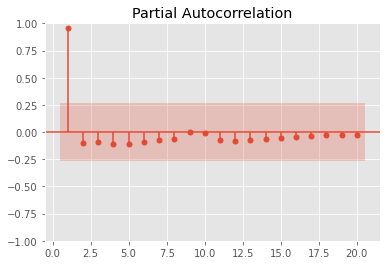

In [8]:
sm.graphics.tsa.plot_pacf(df_gdpUSA['USA_log'], method = 'ywm', zero = False, alpha = 0.05, lags = 20) # Строим PACF
# plt.ylim((-0.1 ,0.3)) # Ограничиваем ось Y
plt.show() # Выводим график

# Параметры функции plot_pacf:
# zero = False - убрали нулевой лаг с графика
# alpha = 0.05 - задали уровень значимости, можно этот атрибут не писать, тогда по умолчанию будет значение 0.05
# lags = 30 - число лагов
# method = 'ywm' - метод Юла-Уокера

In [9]:
df_d1_gdpUSA = df_gdpUSA[['USA_log','USA_log_l1']]
df_d1_gdpUSA=df_d1_gdpUSA.rename(columns = {'USA_log':'d1_USA_log', 'USA_log_l1':'d1_USA_log_l1'} )
print(df_d1_gdpUSA)

    d1_USA_log  d1_USA_log_l1
0    10.762905       0.000000
1    10.771370      10.762905
2    10.779511      10.771370
3    10.786573      10.779511
4    10.792961      10.786573
5    10.799033      10.792961
6    10.804330      10.799033
7    10.808792      10.804330
8    10.812612      10.808792
9    10.816473      10.812612
10   10.820711      10.816473
11   10.824481      10.820711
12   10.827696      10.824481
13   10.831174      10.827696
14   10.835049      10.831174
15   10.838487      10.835049
16   10.841443      10.838487
17   10.843848      10.841443
18   10.847840      10.843848
19   10.849366      10.847840
20   10.851709      10.849366
21   10.853800      10.851709
22   10.856479      10.853800
23   10.856828      10.856479
24   10.852010      10.856828
25   10.844427      10.852010
26   10.835915      10.844427
27   10.827179      10.835915
28   10.818602      10.827179
29   10.809550      10.818602
30   10.799858      10.809550
31   10.789738      10.799858
32   10.78

In [10]:
# Выберем только 1 лаг:
df_d1_gdpUSA_1 = df_d1_gdpUSA[['d1_USA_log', 'd1_USA_log_l1']][1:].reset_index(drop = True)
df_d1_gdpUSA_1.head()

,d1_USA_log,d1_USA_log_l1
0,10.771370,10.762905
1,10.779511,10.771370
2,10.786573,10.779511
3,10.792961,10.786573
4,10.799033,10.792961


In [11]:
# Выделяем X (фаторы) и y (результирующую переменную)
X_1 = df_d1_gdpUSA_1.drop('d1_USA_log', axis = 1) # Должен быть датафреймом
y_1 = df_d1_gdpUSA_1['d1_USA_log'] # Должен быть серией

In [12]:
# Добавляем константу
X_1_c = sm.tools.tools.add_constant(X_1, prepend = True, has_constant = 'skip')

In [13]:
model_linear_1 = sm.OLS(y_1, X_1_c) # Строим модель
result_linear_1 = model_linear_1.fit() # Обучаем на данных
print(result_linear_1.summary()) # Выводим отчет

                            OLS Regression Results                            
Dep. Variable:             d1_USA_log   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     5168.
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           3.88e-52
Time:                        23:36:47   Log-Likelihood:                 197.17
No. Observations:                  52   AIC:                            -390.3
Df Residuals:                      50   BIC:                            -386.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3026      0.154     -1.962

In [14]:
# Residual standard error
np.sqrt(result_linear_1.scale)

0.005566035724155717

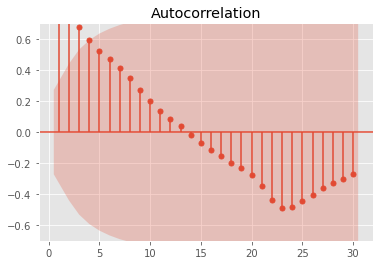

In [15]:
sm.graphics.tsa.plot_acf(result_linear_1.resid, zero = False, alpha = 0.05, lags = 30) # Строим ACF
plt.ylim((-0.7 ,0.7)) # Ограничиваем ось Y
plt.show() # Выводим график

# Метод resid хранит остатки модели

In [16]:
lag = int(log(len(result_linear_1.resid))) # Число степеней свободы - логарифм по времени
p = 1

In [17]:
sm.stats.acorr_ljungbox(result_linear_1.resid, lags=[lag], model_df = p)

,lb_stat,lb_pvalue
3,104.79193,1.756797e-23


Отвергаем гипотезу о случайности остатков.
Модель не смогла избавить нас от автокорреляции остатков.

## ТРИЛАГА

In [18]:
df_d3_gdpUSA_1 = df_gdpUSA[['USA_log','USA_log_l1','USA_log_l2','USA_log_l3']]
print(df_d1_gdpUSA)

    d1_USA_log  d1_USA_log_l1
0    10.762905       0.000000
1    10.771370      10.762905
2    10.779511      10.771370
3    10.786573      10.779511
4    10.792961      10.786573
5    10.799033      10.792961
6    10.804330      10.799033
7    10.808792      10.804330
8    10.812612      10.808792
9    10.816473      10.812612
10   10.820711      10.816473
11   10.824481      10.820711
12   10.827696      10.824481
13   10.831174      10.827696
14   10.835049      10.831174
15   10.838487      10.835049
16   10.841443      10.838487
17   10.843848      10.841443
18   10.847840      10.843848
19   10.849366      10.847840
20   10.851709      10.849366
21   10.853800      10.851709
22   10.856479      10.853800
23   10.856828      10.856479
24   10.852010      10.856828
25   10.844427      10.852010
26   10.835915      10.844427
27   10.827179      10.835915
28   10.818602      10.827179
29   10.809550      10.818602
30   10.799858      10.809550
31   10.789738      10.799858
32   10.78

In [19]:
# Выделяем X (фаторы) и y (результирующую переменную)
X_3 = df_d3_gdpUSA_1.drop('USA_log', axis = 1) # Должен быть датафреймом
y_3 = df_d3_gdpUSA_1['USA_log'] # Должен быть серией

In [20]:
# Добавляем константу
X_3_c = sm.tools.tools.add_constant(X_3, prepend = True, has_constant = 'skip')

In [21]:
model_linear_3 = sm.OLS(y_3, X_3_c) # Строим модель
result_linear_3 = model_linear_3.fit() # Обучаем на данных
print(result_linear_3.summary()) # Выводим отчет

                            OLS Regression Results                            
Dep. Variable:                USA_log   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.052
Method:                 Least Squares   F-statistic:                    0.1365
Date:                Tue, 31 Jan 2023   Prob (F-statistic):              0.938
Time:                        23:36:47   Log-Likelihood:                 78.453
No. Observations:                  53   AIC:                            -148.9
Df Residuals:                      49   BIC:                            -141.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7485      0.057    187.797      0.0

In [22]:
# Residual standard error
np.sqrt(result_linear_3.scale)

0.05727186937268939

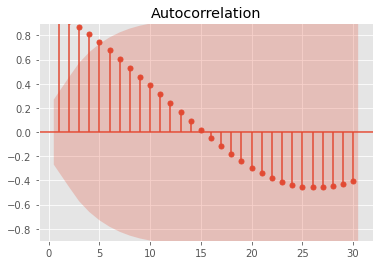

In [23]:
sm.graphics.tsa.plot_acf(result_linear_3.resid, zero = False, alpha = 0.05, lags = 30) # Строим ACF
plt.ylim((-0.9 ,0.9)) # Ограничиваем ось Y
plt.show() # Выводим график

# Метод resid хранит остатки модели

In [24]:
lag = int(log(len(result_linear_3.resid))) # Число степеней свободы - логарифм по времени
p = 3
model_df = p

In [25]:
sm.stats.acorr_ljungbox(result_linear_3.resid, lags=[lag], model_df = p)

,lb_stat,lb_pvalue
3,143.815188,NaN


## ARIMA

# AR с помощью ARIMA

In [26]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(df_d3_gdpUSA_1['USA_log_l1'], trend = 'c', order = (1,0,0))
arima_model = arima_model.fit()
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:             USA_log_l1   No. Observations:                   53
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -95.550
Date:                Tue, 31 Jan 2023   AIC                            197.100
Time:                        23:36:48   BIC                            203.011
Sample:                             0   HQIC                           199.373
                                 - 53                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5473      6.997      1.508      0.132      -3.166      24.260
ar.L1          0.1472      0.606      0.243      0.808      -1.041       1.335
sigma2         2.1541      2.532      0.851      0.3

# MA С помощиью ARIMA

In [27]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(df_d3_gdpUSA_1['USA_log_l1'][1:], trend = 'c', order = (0,0,3))
arima_model = arima_model.fit()
print(arima_model.summary())

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:             USA_log_l1   No. Observations:                   52
Model:                 ARIMA(0, 0, 3)   Log Likelihood                 168.182
Date:                Tue, 31 Jan 2023   AIC                           -326.365
Time:                        23:36:48   BIC                           -316.609
Sample:                             0   HQIC                          -322.625
                                 - 52                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7816      0.009   1253.637      0.000      10.765      10.798
ma.L1          2.4714      9.267      0.267      0.790     -15.692      20.635
ma.L2          2.4689     14.951      0.165      0.8

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [28]:
b_0 = 0.0024 * (1 - sum(arima_model.maparams))
b_0

-0.011850418081199052

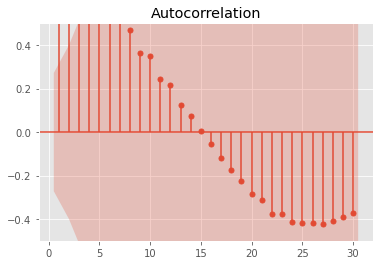

In [29]:
sm.graphics.tsa.plot_acf(arima_model.resid, zero = False, alpha = 0.05, lags = 30) # Строим ACF
plt.ylim((-0.5 ,0.5)) # Ограничиваем ось Y
plt.show() # Выводим график


In [30]:
# lag = int(log(len(arima_model.resid))) # Число степеней свободы - логарифм по времени
lag = 3
p = 0
model_df = p

In [31]:
sm.stats.acorr_ljungbox(arima_model.resid, lags=[lag], model_df = p)

,lb_stat,lb_pvalue
3,101.282805,8.234789e-22


In [32]:
    arima_model = ARIMA(df_d3_gdpUSA_1['USA_log_l1'][1:], trend = 'c', order = (0,0,1))
arima_model = arima_model.fit()
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:             USA_log_l1   No. Observations:                   52
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 111.069
Date:                Tue, 31 Jan 2023   AIC                           -216.139
Time:                        23:36:49   BIC                           -210.285
Sample:                             0   HQIC                          -213.895
                                 - 52                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7836      0.009   1261.448      0.000      10.767      10.800
ma.L1          0.9999    134.593      0.007      0.994    -262.797     264.797
sigma2         0.0008      0.102      0.007      0.9

In [33]:
b_0 = 0.0024 * (1 - sum(arima_model.maparams))
b_0

2.3530863336933548e-07

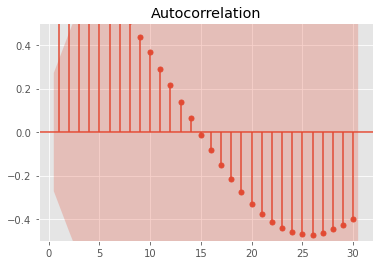

In [34]:
sm.graphics.tsa.plot_acf(arima_model.resid, zero = False, alpha = 0.05, lags = 30) # Строим ACF
plt.ylim((-0.5 ,0.5)) # Ограничиваем ось Y
plt.show() # Выводим график


In [35]:
lag = 1
p = 0
model_df = p

In [36]:
sm.stats.acorr_ljungbox(arima_model.resid, lags=[lag], model_df = p)

,lb_stat,lb_pvalue
1,49.850138,1.659487e-12


In [37]:
from statsmodels.tsa.stattools import adfuller

adfuller(df_gdpUSA['USA_log'], regression = 'c', maxlag = 1)


(-0.9282470223715209,
 0.7785280185620433,
 1,
 51,
 {'1%': -3.5656240522121956,
  '5%': -2.920142229157715,
  '10%': -2.598014675124952},
 -493.1259340733068)

In [38]:
arima_model = ARIMA(df_d3_gdpUSA_1['USA_log_l1'][1:], trend = 'c', order = (0,0,2))
arima_model = arima_model.fit()
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:             USA_log_l1   No. Observations:                   52
Model:                 ARIMA(0, 0, 2)   Log Likelihood                 142.034
Date:                Tue, 31 Jan 2023   AIC                           -276.068
Time:                        23:36:49   BIC                           -268.263
Sample:                             0   HQIC                          -273.076
                                 - 52                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7823      0.008   1269.104      0.000      10.766      10.799
ma.L1          1.9027      1.242      1.532      0.126      -0.531       4.337
ma.L2          0.9895      1.296      0.764      0.4

In [39]:
b_0 = 0.0024 * (1 - sum(arima_model.maparams))
b_0

-0.004541152394586282

In [40]:
lag = 1
p = 0
model_df = p

In [41]:
sm.stats.acorr_ljungbox(arima_model.resid, lags=[lag], model_df = p)

,lb_stat,lb_pvalue
1,44.30948,2.803553e-11


In [42]:
import pmdarima as pm

# Auto_arima (инициализация модели)       
model_auto_arima = pm.auto_arima(df_gdpUSA['USA'])
model_auto_arima.fit(df_gdpUSA['USA']).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   53
Model:               SARIMAX(0, 2, 1)   Log Likelihood                -299.601
Date:                Tue, 31 Jan 2023   AIC                            603.202
Time:                        23:36:51   BIC                            607.066
Sample:                             0   HQIC                           604.678
                                 - 53                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2952      0.121      2.442      0.015       0.058       0.532
sigma2      7045.2983    786.371      8.959      0.000    5504.040    8586.556
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                67.77
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               9.22   Skew:                            -0.73
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
# На какой период хотим сроить прогноз?
horizon = 10

In [44]:
preds, conf_int = model_auto_arima.predict(horizon, return_conf_int = True)

In [45]:
conf_int = pd.DataFrame(conf_int)
conf_int.columns = ['yhat_dn', 'yhat_up']
conf_int.index = list(range(len(df_gdpUSA['USA']), len(df_gdpUSA['USA']) + horizon))

In [46]:
yhat_dn = conf_int['yhat_dn']
yhat_up = conf_int['yhat_up']

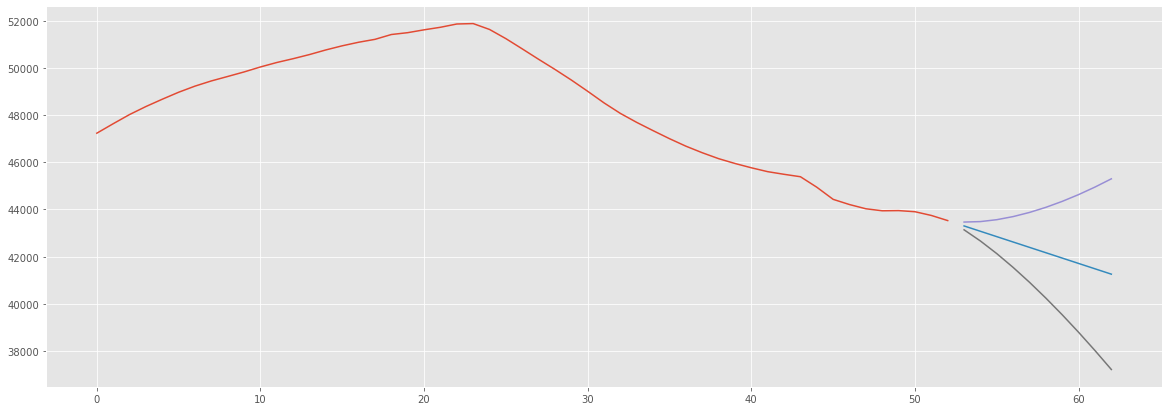

In [47]:
# Оценим качество прогноза для исходного ряда
plt.figure(figsize = (20, 7))

# График ряда
plt.plot(df_gdpUSA['USA'].reset_index(drop = True), label = 'Train')

# График прогноза
plt.plot(preds, label = 'yhat')

plt.plot(yhat_up, label = 'yhat_up')

plt.plot(yhat_dn, label = 'yhat_dn')

plt.show()

const    -0.048213
ar.L1    -0.342794
ma.L1     0.724133
sigma2    0.953102
dtype: float64


<AxesSubplot:>

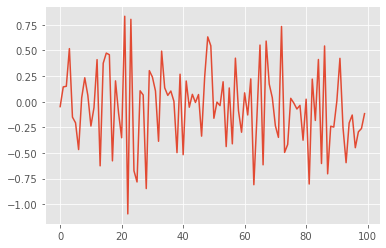

In [48]:
arparams = np.array([0.1])
maparams = np.array([0.3])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
y = sm.tsa.arma_generate_sample(ar, ma, 100)
model = ARIMA(pd.Series(y), trend = None, order = (1,0,1)).fit()
print(model.params)
model.predict().plot()

In [49]:
from statsmodels.tsa.stattools import adfuller

adfuller(df_gdpUSA['USA_log'], regression = 'c', maxlag = 1)

(-0.9282470223715209,
 0.7785280185620433,
 1,
 51,
 {'1%': -3.5656240522121956,
  '5%': -2.920142229157715,
  '10%': -2.598014675124952},
 -493.1259340733068)

In [50]:
sm.stats.acorr_ljungbox(arima_model.resid)

,lb_stat,lb_pvalue
1,44.309480,2.803553e-11
2,88.988742,4.746135e-20
3,126.677121,2.812487e-27
4,162.175573,4.992295e-34
5,191.544611,1.826518e-39
6,216.725207,5.193538e-44
7,237.163270,1.490364e-47
8,252.765553,4.466005e-50
9,264.879402,7.163572e-52
10,273.352696,6.570238e-53
